In [2]:
#importing libraries
import numpy as np
from scipy import stats  
import math as math
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
from statsmodels.tsa.stattools import acf as accf
import statsmodels.api as sm

# Question 1

In [9]:
energy_intake = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
rec_value = np.array([7725])

#finding the eman of both dataset
energy_mean = energy_intake.mean()
rec_mean = rec_value.mean()

#calc standard deviations
std_ener, std_rec = np.std(energy_intake,ddof=1), np.std(rec_value,ddof=1)

#calc standard error
se1,se2 = stats.sem(energy_intake),stats.sem(rec_value)

# standard error on the difference between the samples
sed = math.sqrt(se1**2)
sed
#t-statistic
t_stat = (energy_mean - rec_mean)/sed
t_stat
#defree of freedom
df = 11+1 -2
df
#finding p-value
p = (1-stats.t.cdf(abs(t_stat),df))*2

print("The sample mean is {}".format(energy_mean))
print("The sample standard deviation is {}".format(std_ener))
print("The standard error of the mean (SEM) is {}".format(se1))
print("The t statistic, is {}".format(t_stat))
print("The degrees of freedom  is {}".format(df))
print("The p-value is {}".format(p))
print("The standard error on the difference between the samples", sed)

The sample mean is 6753.636363636364
The sample standard deviation is 1142.1232221373727
The standard error of the mean (SEM) is 344.3631083801271
The t statistic, is -2.8207540608310198
The degrees of freedom  is 10
The p-value is 0.01813723517610577
The standard error on the difference between the samples 344.3631083801271


# Question 2

In [10]:
mean_ireland = 74
mean_elsewhere = 57
size_ireland = 42
size_elsewhere = 61
std_elsewhere = 7.1
std_ireland = 7.4

df = size_elsewhere+size_ireland-2 #degree of freedom
print("The degree of freedom",df)

#standard error
se_irl, se_els = std_ireland/math.sqrt(size_ireland), std_elsewhere/math.sqrt(size_elsewhere)
print(se_irl,se_els)
# standard error on the difference between the samples
sed = math.sqrt(se_irl**2+se_els**2)  
print(sed)
#t-statistic
t_stat = (mean_ireland-mean_elsewhere)/sed
print("T-statistic: ",t_stat)

#finding the p-value
p = (1-stats.t.cdf(t_stat,df))*2
print("p-value: ",  p)

The degree of freedom 101
1.1418447897194801 0.9090618475235615
1.4595214854302332
T-statistic:  11.647653131319812
p-value:  0.0


# Question 3

The correlation coefficient is  -0.5255135380223263


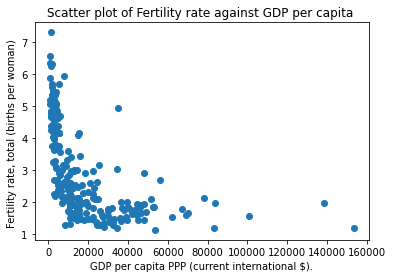

In [11]:
#reading dataset
gdp = pd.read_excel('gdp.xls')
# gdp['2013']
fertility = pd.read_excel("Fertility.xlsx")
fertility['2013']
#creating a dataframe
df = pd.DataFrame(gdp['2013'])
df['fert']=fertility['2013'] #inserting the fertility data column into the df 
df=df.dropna() #drop nan values 
plt.scatter(df['2013'],df['fert']) #plot the scatter 
#label the graph
plt.xlabel("GDP per capita PPP (current international $).")
plt.ylabel("Fertility rate, total (births per woman) ")
plt.title("Scatter plot of Fertility rate against GDP per capita ")
#calculating correlation coefficient 
corr,_=stats.pearsonr(df['2013'],df['fert'])
print("The correlation coefficient is ",corr)

# Question 4

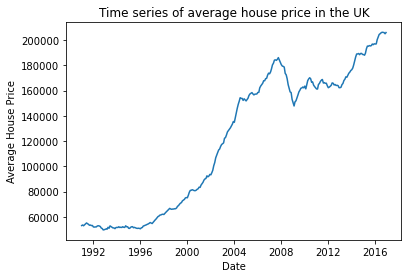

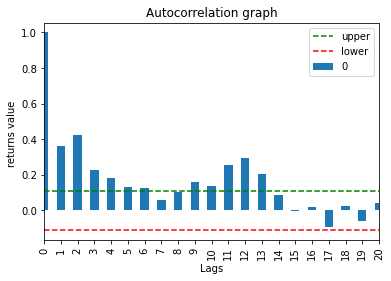

In [12]:
data=pd.read_excel('Monthly Average House Price.xls') #reading data 
# selecting data from 1991 to 2016
dat = data.iloc[0:312,[0,1]]
# dat
plt.plot(dat['Date'],dat["Average House Price"]) #plot the timeseries 

#label the graph
plt.xlabel("Date")
plt.ylabel("Average House Price")
plt.title("Time series of average house price in the UK")

#finding the returns
arr = []
# returns
for i in range(1,len(dat["Average House Price"])):
#     returns2 = (dat["Average House Price"][1]/dat["Average House Price"][i-1])-1
    arr.append((dat["Average House Price"][i]/dat["Average House Price"][i-1])-1)
    
# plot the autocorrelation function, acf
pd.DataFrame(acf(np.array(arr))).plot(kind='bar')
# xy=plot_acf(acf(np.array(arr)))
# plt.bar(acf(np.array(arr)))
# label plot
plt.xlim(0,20)
plt.xlabel("Lags")
plt.ylabel("returns value ")
plt.title("Autocorrelation graph")

#calculating values for p <0.05
ssig1 = 1.96/math.sqrt(len(arr))
ssig2 = -1.96/math.sqrt(len(arr))
plt.hlines(ssig1,0,24,linestyles='dashed',colors='green',label='upper')
plt.hlines(ssig2,0,24,linestyles='dashed',colors='red',label='lower')
plt.legend()
# dat["Average House Price"]


In [13]:
#calc annualized return
#annual return for 1991
ret=[]
ret2=[]
# finding the annual return for each year
for i in range(0,312,12):
    ret.append((dat["Average House Price"][i+11]-dat["Average House Price"][i])/dat["Average House Price"][i])
# adding to all of them    
for num in ret:
    nums= (1+num)
    ret2.append(nums)
ret.clear() #emptying the ret array
mulsum = 1
for number in ret2:
    mulsum *= number  #finding the cumulative sum to find the annulaized return
ann_ret=(mulsum**(1/len(ret2))-1)*100 #calculating the annualized return
print("The annualized return is: ",ann_ret)

The annualized return is:  5.648250467891458


# Question 5

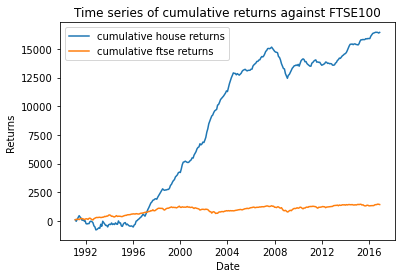

In [14]:
ftse = pd.read_csv('FTSE100.csv') #reading data
cum_returns = [] #empty array to store cumulative returns 
returns = []
numsum = 0
#find cumulative returns of house returns and store in an array
for num in arr:
    numsum += num
    cum_returns.append(numsum)
    
#returns of ftse
for i in range(0,len(ftse['Adj Close'])-1):
#     returns2 = (dat["Average House Price"][1]/dat["Average House Price"][i-1])-1
    returns.append((ftse['Adj Close'][i]/ftse['Adj Close'][i+1])-1)
returns
ftsea = 0
cum_ftse = []
#find cumulative FTSE100 
for r in range(len(returns)-1,-1,-1):
#     print(r)
    ftsea += returns[r]
    cum_ftse.append(ftsea)

#normalise datasets
cum_ftse = np.array(cum_ftse)
cum_returns = cum_returns/cum_returns[0]*100
cum_ftse = cum_ftse/cum_ftse[0]*100

#plot datasets
plt.plot(dat['Date'][1:312],cum_returns,label='cumulative house returns')
plt.plot(dat['Date'][1:312],cum_ftse,label='cumulative ftse returns')

# label plot
plt.xlabel("Date")
plt.ylabel("Returns ")
plt.title("Time series of cumulative returns against FTSE100")
plt.legend()

In [15]:
#calc annualized return
ret=[]
ret2=[]

# finding the annual return for each year
for i in range(0,312,12):
#     print(i)
    ret.append((ftse['Adj Close'][i]-ftse['Adj Close'][i+11])/ftse['Adj Close'][i+11])
# adding to all of them   
len(ret)
for num in ret:
    nums= (1+num)
    ret2.append(nums)
ret.clear() #emptying the ret array
mulsum = 1
for number in ret2:
    mulsum *= number  #finding the cumulative sum to find the annulaized return
ann_ret=(mulsum**(1/len(ret2))-1)*100 #calculating the annualized return
print("The annualized return is: ",ann_ret)
# print("Average annualized return is",ann_ret/len(ret2))

The annualized return is:  5.422829667751272
